In [27]:
import pandas as pd
import numpy as np

In [2]:
!ls ../data/

air_quality_country.csv
countries.geo.json
F00007762-WV6_Data_R_v20180912.zip
lat_lon_counties.csv
www.worldvaluessurvey.org-WVSDocumentationWV6.jsp


## Countries list

In [49]:
import json
with open('../data/countries.geo.json') as f:
    data = json.load(f)
    
all_countries = [d['properties']['name'] for d in data['features']]
print(len(all_countries), all_countries[0:7])

180 ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antarctica']


## Air quality data

In [52]:
df = pd.read_csv('../data/air_quality_country.csv', sep=',')
print(df.shape)
print('%d %s' % (len(df['Type'].unique()), 'countries'))
df.head(5)

(2340, 11)
195 countries


,Exposure_Id,Type,ISO3,Region_Name,Exposure_Lower,Exposure_Mean,Exposure_Upper,Year,Pollutant,Pollutant_Name,Units
0,5989,Afghanistan,AFG,Afghanistan,31.0,65.0,113.0,1990,pm25,PM25,µg/m3
1,5990,Afghanistan,AFG,Afghanistan,29.0,65.0,116.0,1995,pm25,PM25,µg/m3
2,5991,Afghanistan,AFG,Afghanistan,28.0,65.0,116.0,2000,pm25,PM25,µg/m3
3,5992,Afghanistan,AFG,Afghanistan,27.0,65.0,121.0,2005,pm25,PM25,µg/m3
4,5993,Afghanistan,AFG,Afghanistan,30.0,65.0,119.0,2010,pm25,PM25,µg/m3


In [53]:
df_latest = df[df.Year==2015]
max(df_latest.Exposure_Mean), max(df_latest.Exposure_Upper), np.mean(df_latest.Exposure_Upper)

(97.0, 273.0, 55.197435897435895)

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

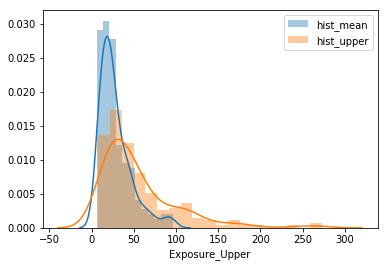

In [59]:
sns.distplot(df_latest.Exposure_Mean, label='hist_mean')
sns.distplot(df_latest.Exposure_Upper, label='hist_upper')
plt.legend()

## Countries consistency between datasets

In [66]:
len(set(df_latest['Type'].unique())-set(all_countries))

34

In [68]:
set(df_latest['Type'].unique())-set(all_countries)

{'American Samoa',
 'Andorra',
 'Antigua and Barbuda',
 'Bahrain',
 'Barbados',
 'Cape Verde',
 'Comoros',
 'Congo',
 "Cote d'Ivoire",
 'Dominica',
 'Federated States of Micronesia',
 'Grenada',
 'Guam',
 'Guinea-Bissau',
 'Kiribati',
 'Maldives',
 'Marshall Islands',
 'Mauritius',
 'Northern Mariana Islands',
 'Palestine',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Tanzania',
 'The Gambia',
 'Timor-Leste',
 'Tonga',
 'United States',
 'Virgin Islands U.S.'}

In [73]:
len(set(all_countries)-set(df_latest['Type'].unique()))

19

In [69]:
set(all_countries)-set(df_latest['Type'].unique())

{'Antarctica',
 'East Timor',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Gambia',
 'Guinea Bissau',
 'Ivory Coast',
 'Kosovo',
 'New Caledonia',
 'Northern Cyprus',
 'Republic of Serbia',
 'Republic of the Congo',
 'Russia',
 'Somaliland',
 'United Republic of Tanzania',
 'United States of America',
 'West Bank',
 'Western Sahara'}

In [70]:
mapping = {
    'Guinea-Bissau': 'Guinea Bissau',
    "Cote d'Ivoire": 'Ivory Coast',
    'Serbia': 'Republic of Serbia',
    'Congo': 'Republic of the Congo',
    'Russian Federation': 'Russia',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',   
}
def replace_country_name(x):
    """ """
    if x in mapping.keys():
        return mapping[x]
    return x

df_latest['Country'] = df_latest['Type'].apply(replace_country_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [74]:
len(set(all_countries)-set(df_latest['Country'].unique()))

12

## Merge list of countries with Normalized Air quality estimate

In [83]:
df_final = pd.DataFrame(all_countries, columns=['Country']).merge(df_latest[['Country', 'Exposure_Mean']])
scaler = np.max(df_latest['Exposure_Mean'])*1.05
df_final['Exposure_Norm'] = (100*df_final['Exposure_Mean']/scaler).astype(int)

In [84]:
df_final

,Country,Exposure_Mean,Exposure_Norm
0,Afghanistan,61.0,59
1,Angola,33.0,32
2,Albania,20.0,19
3,United Arab Emirates,42.0,41
4,Argentina,15.0,14
5,Armenia,35.0,34
6,Australia,9.3,9
7,Austria,14.0,13
8,Azerbaijan,21.0,20
9,Burundi,38.0,37


In [85]:
N_BINS = 10
df_final['bin'] = (df_final['Exposure_Norm']/N_BINS).astype(int)

In [90]:
#partitions = df_final.groupby('bin')[0].apply(list).to_json()
partitions = df_final.groupby('bin')['Country'].apply(list)

In [91]:
partitions

bin
0    [Australia, Brunei, Canada, Spain, Estonia, Fi...
1    [Albania, Argentina, Austria, Belgium, The Bah...
2    [Azerbaijan, Bulgaria, Bosnia and Herzegovina,...
3    [Angola, Armenia, Burundi, Benin, Bhutan, Alge...
4    [United Arab Emirates, Burkina Faso, Democrati...
5    [Afghanistan, Central African Republic, China,...
6                     [Bangladesh, Iraq, Kuwait, Chad]
7                                  [Cameroon, Nigeria]
8                                [Egypt, India, Niger]
9                         [Nepal, Qatar, Saudi Arabia]
Name: Country, dtype: object

## Misc: seaborn color palette

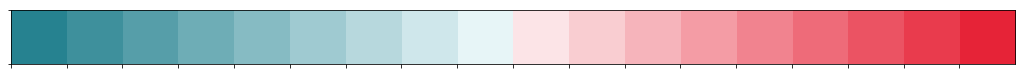

In [176]:
## asymetrical diverging palette thanks to ofst
ofst = 8
palette = sns.diverging_palette(210, 10, 90, n=N_BINS+ofst)
sns.palplot(palette)

In [177]:
print(palette.as_hex()[ofst:])

['#e8f6f8', '#fce5e7', '#f9cdd2', '#f7b4bb', '#f49ca6', '#f1848f', '#ef6c7a', '#ec5363', '#e93b4e', '#e72338']
